In [1]:
import scipy.ndimage
import numpy as np
dataMatrix = [0] * 10304
for i in range(40):
    for j in range(10):
        imageMatrix = scipy.ndimage.imread('D:/college/Pattern/Assigmnent/orl_faces/s' + str(i+1)+'/' +
                                 str(j+1) +'.pgm',flatten=False, mode=None)
        imagePixelsVector = np.asarray(imageMatrix).reshape(-1)
        dataMatrix = np.vstack([dataMatrix, imagePixelsVector])

In [2]:
dataMatrix = dataMatrix[1:,0:]
#print(len(dataMatrix[:,0]))

In [3]:
dataMatrix

array([[ 48,  49,  45, ...,  47,  46,  46],
       [ 60,  60,  62, ...,  32,  34,  34],
       [ 39,  44,  53, ...,  29,  26,  29],
       ..., 
       [125, 119, 124, ...,  36,  39,  40],
       [119, 120, 120, ...,  89,  94,  85],
       [125, 124, 124, ...,  36,  35,  34]])

In [211]:
labelVector = []
labelVector1 = []
for i in range(40):
    for j in range (10):
        labelVector.append(i+1)
#print(len(labelVector))

In [212]:
trainingData = dataMatrix[0]
testData = dataMatrix[1]
trainingDataLabelVector = []
testDataLabelVector = []

trainingDataLabelVector.append(labelVector[0])
testDataLabelVector.append(labelVector[1])
index = 2 
while(index < 400):
    if(index % 2 == 0):
        trainingData = np.vstack([trainingData, dataMatrix[index]])
        trainingDataLabelVector.append(labelVector[index])
    else:
         testData = np.vstack([testData, dataMatrix[index]])
         testDataLabelVector.append(labelVector[index])
    index += 1

In [189]:
#trainingData
labelVector1
#testData

40

# LDA Algorithms for Face Recognition 

In [6]:
#calculate overall mean
meanOverall = trainingData.mean(axis=0)
#print(meanOverall)
#calculate mean for each sample.
meanSampleClass = []
for i in range(40):
 meanSampleClass.append(trainingData[5*i:5*(i+1),:].mean(axis=0))

In [7]:
#calculate sb
SB_Matrix = np.zeros((10304,10304),dtype=float)
for i in range(40):
 SB_Matrix+=(np.outer(np.subtract(meanSampleClass[i],meanOverall),(np.transpose(np.subtract(meanSampleClass[i],meanOverall)))))

SB_Matrix = 5 * SB_Matrix

In [8]:
#calculate CenterDataMatrix
CenterDataMatrix = []
for i in range(40):
     CenterDataMatrix.append(trainingData[5*i:5*(i+1),:] - meanSampleClass[i]) 

In [9]:
#calculate Scatter Matrix
Scatter_Matrix = [0]*10304
for i in range(40):
    Scatter_Matrix += np.matmul(np.transpose(CenterDataMatrix[i]), CenterDataMatrix[i])

In [10]:
#calculate inverse Scatter Matrix
Scatter_Matrix_Inverse = np.linalg.pinv(Scatter_Matrix)

In [11]:
#calculate inverse Scatter Matrix . SB_Matrix
SInverseB = np.matmul(Scatter_Matrix_Inverse, SB_Matrix)

In [12]:
#calculate dominat
eigenValue, eigenVector = np.linalg.eig(SInverseB)

In [13]:
#Arrange(sort) eigenValue,eigenVector
idx = eigenValue.argsort()[::-1]   
eigenValue = eigenValue[idx]
eigenVector = eigenVector[:,idx]
eigenVector = np.real(eigenVector)

In [14]:
projection = eigenVector[:,:40]

In [15]:
training_projection = np.matmul(trainingData, projection)

In [16]:
testing_projection  = np.matmul(testData, projection)

In [18]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier
#import metrics model to check the accuracy 
from sklearn import metrics
# utility method to apply the knn classifier and return the score resulted.
def knn(trainingSet,trainingLabel,testSet,testLabel,k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainingSet,trainingLabel)
    pred=knn.predict(testSet)
    score  = metrics.accuracy_score(testLabel,pred)
    return score

In [44]:
K_NN = [1,3,5,7]
score = []
for k in K_NN:
    r = knn(training_projection, trainingDataLabelVector, testing_projection, testDataLabelVector,k)
    score.append(r) 

In [250]:
score
scr = np.multiply(100,score)

In [67]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure

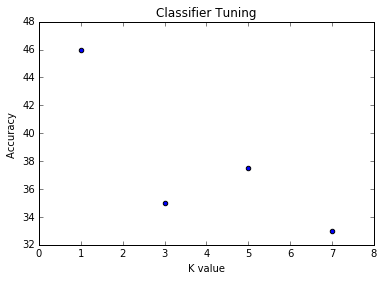

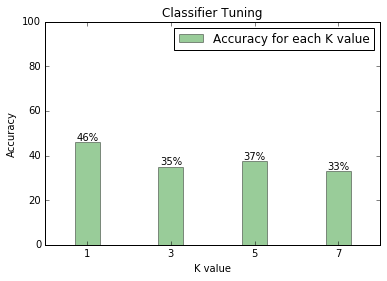

In [273]:
#plot as point
plt.scatter(K_NN,scr)
plt.title("Classifier Tuning")
plt.xlabel("K value")
plt.ylabel("Accuracy ")

plt.show()
#plot as barchar
y_pos = np.arange(len(score))
bar = plt.bar(y_pos, scr, align='center', alpha=0.4,color='g',label='Accuracy for each K value',width= 0.3)
plt.xticks(y_pos, K_NN)
plt.title("Classifier Tuning")
plt.xlabel("K value")
plt.ylabel("Accuracy")

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height)+'%', ha='center', va='bottom')
plt.ylim(0, 100)
plt.legend()
plt.show()

# LDA for Spliting matrix 70  30

In [229]:
    training_data = [0] * len(dataMatrix[0])
    training_data_labels = []
    test_data = [0] * len(dataMatrix[0])
    test_data_labels = []
    for i in range(40):
        for j in range(7):
            training_data = np.vstack([training_data, dataMatrix[i*10 + j]])
            training_data_labels.append(labelVector[i*10 + j])
        for k in range(3):
            test_data = np.vstack([test_data, dataMatrix[i*10 + 7 + k]])
            test_data_labels.append(labelVector[i*10 + 7 + k])

    training_data = training_data[1:,0:]
    test_data = test_data[1:,0:]

In [233]:
print(training_data[7])
print(dataMatrix[10])

[ 35  36  37 ..., 144 147 143]
[ 35  36  37 ..., 144 147 143]


In [234]:
#calculate overall mean
meanOverall = training_data.mean(axis=0)
#print(meanOverall)
#calculate mean for each sample.
meanSampleClass = []
for i in range(40):
 meanSampleClass.append(training_data[7*i:7*(i+1),:].mean(axis=0))

In [235]:
#calculate sb
SB_Matrix = np.zeros((10304,10304),dtype=float)
for i in range(40):
 SB_Matrix+=(np.outer(np.subtract(meanSampleClass[i],meanOverall),(np.transpose(np.subtract(meanSampleClass[i],meanOverall)))))

SB_Matrix = 7 * SB_Matrix

In [236]:
#calculate CenterDataMatrix
CenterDataMatrix = []
for i in range(40):
     CenterDataMatrix.append(training_data[7*i:7*(i+1),:] - meanSampleClass[i])

In [237]:
#calculate Scatter Matrix
Scatter_Matrix = [0]*10304
for i in range(40):
    Scatter_Matrix += np.matmul(np.transpose(CenterDataMatrix[i]), CenterDataMatrix[i])

In [238]:
#calculate inverse Scatter Matrix
Scatter_Matrix_Inverse = np.linalg.pinv(Scatter_Matrix)

In [239]:
#calculate inverse Scatter Matrix . SB_Matrix
SInverseB = np.matmul(Scatter_Matrix_Inverse, SB_Matrix)

In [240]:
#calculate dominat
eigenValue, eigenVector = np.linalg.eig(SInverseB)

In [241]:
#Arrange(sort) eigenValue,eigenVector
idx = eigenValue.argsort()[::-1]   
eigenValue = eigenValue[idx]
eigenVector = eigenVector[:,idx]
eigenVector = np.real(eigenVector)

In [242]:
projection = eigenVector[:,:40]

In [243]:
training_projection = np.matmul(training_data, projection)

In [244]:
testing_projection  = np.matmul(test_data, projection)

In [246]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier
#import metrics model to check the accuracy 
from sklearn import metrics
# utility method to apply the knn classifier and return the score resulted.
def knn(trainingSet,trainingLabel,testSet,testLabel,k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainingSet,trainingLabel)
    pred=knn.predict(testSet)
    score  = metrics.accuracy_score(testLabel,pred)
    return score

In [247]:
K_NN = [1,3,5,7]
score1 = []
for k in K_NN:
    rr = knn(training_projection, training_data_labels, testing_projection, test_data_labels,k)
    score1.append(rr) 


In [249]:
score1
scr1 = np.multiply(100,score1)

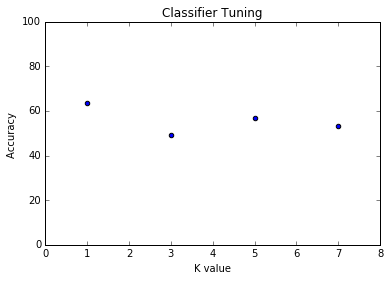

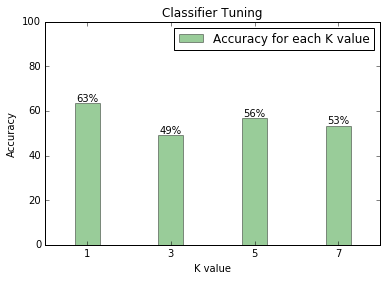

In [270]:
#plot as point
plt.scatter(K_NN,scr1)
plt.title("Classifier Tuning")
plt.xlabel("K value")
plt.ylabel("Accuracy ")
plt.ylim(0, 100)
plt.show()
#plot as barchar
y_pos = np.arange(len(score1))
bar = plt.bar(y_pos, scr1, align='center', alpha=0.4,color='g',label='Accuracy for each K value',width= 0.3)
plt.xticks(y_pos, K_NN)
plt.title("Classifier Tuning")
plt.xlabel("K value")
plt.ylabel("Accuracy")

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height)+'%', ha='center', va='bottom')
plt.ylim(0, 100)
plt.legend()
plt.show()

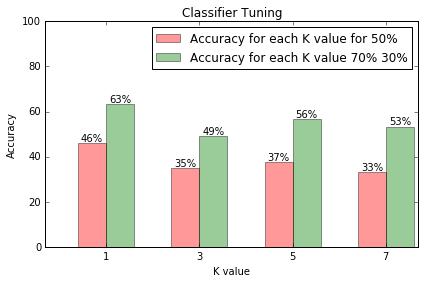

In [267]:
#plot as barchar


y_pos = np.arange(len(score1))
bar1 = plt.bar(y_pos, scr, align='center', alpha=0.4,color='r',label='Accuracy for each K value for 50%',width= 0.3)
bar2 = plt.bar(y_pos+0.3, scr1, align='center', alpha=0.4,color='g',label='Accuracy for each K value 70% 30%',width= 0.3)



plt.xticks(y_pos+.15, K_NN)
plt.title("Classifier Tuning")
plt.xlabel("K value")
plt.ylabel("Accuracy")

for rect in bar1+bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height)+'%', ha='center', va='bottom')
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()

plt.show()